In [33]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [34]:
def load_cosmicflows_data(cosmicflow_name):
    dtype=[('PGC' ,'i8'),('dist' ,'f8'),('Nd','i8'),('RAJ','S8'),('DECJ','S8'),('Ks', 'f8'),('VCMB','f8'),('VMOD','f8')]
    snap_data = np.loadtxt(cosmicflow_name, dtype=dtype)    
   
    return snap_data

In [35]:
!head ../data/obs/cosmicflows.dat

#"Cosmicflows-3 Distances" "Cosmicflows-3 Distances" "Cosmicflows-3 Distances" "Cosmicflows-3 Distances" "Cosmicflows-3 Distances" "Cosmicflows-3 Distances" "Cosmicflows-3 Distances"
#pgc Dist Nd RAJ DeJ Ks Vcmb Vmod
#%7s %6.2f %1d %8s %9s %5.2f %5d %5d
#--- Mpc  hms damas mag km/s km/s
#"The Catalogue of Principal Galaxies (PGC) Number" "Luminosity distance (weighted average if more than one source)" "Number of distance sources" "Right Ascension (J2000)" "Declination (J2000)" "2MASS Ks magnitude, extinction corrected from Huchra et al. 2012 or else Lavaux-Hudson 2011" "Velocity in CMB standard of rest (Fixsen et al. 1996)" "Velocity in CMB standard of rest adjusted in accordance with a cosmological model with Omega_matter=0.27 and Omega_Lambda=0.73"
4 50.58 1 000003.5 +230515 0.00 4109 4154
27 150.66 1 000023.5 -065610 0.00 10959 11275
40 116.95 1 000035.6 -014547 0.00 6919 7045
51 240.99 1 000035.8 -403432 0.00 14771 15342
55 73.79 1 000037.4 +333603 0.00 4454 4507


In [36]:
data = load_cosmicflows_data("../data/obs/cosmicflows.dat")

In [66]:
n_points = len(data)
ra_data = np.array(np.zeros(n_points), dtype=[('RA', 'f8')])
dec_data = np.array(np.zeros(n_points), dtype=[('DEC', 'f8')])

for i in range(n_points):
    raj = data['RAJ'][i].decode()
    decj = data['DECJ'][i].decode()
    rah = float(raj[0:2])#hours
    ram = float(raj[2:4])#minutes
    ras = float(raj[4:])#seconds
    if(len(decj)==7):
        decd = float(decj[0:3])#degrees
        decam = float(decj[3:5])#arcminutes
        decas = float(decj[5:7])#arcseconds
    elif(len(decj)==6):
        decd = float(decj[0:2])#degrees
        decam = float(decj[2:4])#arcminutes
        decas = float(decj[4:6])#arcseconds
    if(decj[0]=='-'):
        sign = -1.0
    else:
        sign = +1.0
    ra_data['RA'][i] = (rah + ram/60.0 + ras/3600.0) * (360.0/24.0)
    dec_data['DEC'][i] = decd + sign*decam/60.0 + sign*decas/3600.0
    
    if(dec_data['DEC'][i]>90.0):
        print(i, decj, len(decj), data['DECJ'][i], dec_data['DEC'][i])
    #print(i, decj, len(decj), data['DECJ'][i], dec_data['DEC'][i])
    #print(raj, rah, ram, ras)
    #print(decj, decd, decam, decas)

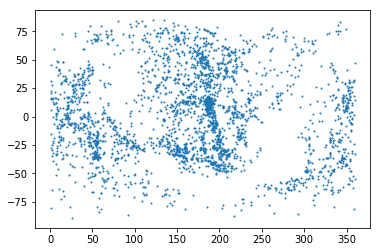

In [70]:
plt.scatter(ra_data['RA'][data['dist']<50],dec_data['DEC'][data['dist']<50.0], s =1.0)